<a href="https://colab.research.google.com/github/cyberxx7/Star_classification/blob/main/star_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [4]:
df = pd.read_csv("star_classification.csv")
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43797,1.237659e+18,201.624727,6.578219,20.98239,18.84827,17.68662,17.23599,16.88903,3230,301,2,27,2.025522e+18,GALAXY,0.160690,1799,53556,101
43798,1.237679e+18,325.211753,2.045357,20.85815,20.65278,20.43727,20.36541,20.16899,7717,301,4,97,1.031689e+19,QSO,1.428801,9163,58043,968
43799,1.237661e+18,202.717281,45.848246,23.46482,22.33689,20.90505,19.86001,19.24836,3699,301,3,103,7.461520e+18,GALAXY,0.588259,6627,56369,661
43800,1.237661e+18,115.883288,20.052520,23.58445,22.85084,22.56028,21.89615,23.57576,3605,301,4,39,1.008138e+19,GALAXY,0.951026,8954,57453,261


In [5]:
new = df.rename(columns={'u':'Ultraviolet Filter', 'g': 'Green Filter', 'r': 'Red Filter', 'z': 'Infared Filter', 'i': 'Near Infared Filter'})
new

,obj_ID,alpha,delta,Ultraviolet Filter,Green Filter,Red Filter,Near Infared Filter,Infared Filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43797,1.237659e+18,201.624727,6.578219,20.98239,18.84827,17.68662,17.23599,16.88903,3230,301,2,27,2.025522e+18,GALAXY,0.160690,1799,53556,101
43798,1.237679e+18,325.211753,2.045357,20.85815,20.65278,20.43727,20.36541,20.16899,7717,301,4,97,1.031689e+19,QSO,1.428801,9163,58043,968
43799,1.237661e+18,202.717281,45.848246,23.46482,22.33689,20.90505,19.86001,19.24836,3699,301,3,103,7.461520e+18,GALAXY,0.588259,6627,56369,661
43800,1.237661e+18,115.883288,20.052520,23.58445,22.85084,22.56028,21.89615,23.57576,3605,301,4,39,1.008138e+19,GALAXY,0.951026,8954,57453,261


In [6]:
lst = []
for change in range(len(new['class'])):
    if new['class'][change] == 'GALAXY':
        lst.append(1)
    elif new['class'][change] == 'QSO':
        lst.append(0)
    elif new['class'][change] == 'STAR':
        lst.append(2)
    else:
        lst.append(new['class'][change])
new['class'] = lst

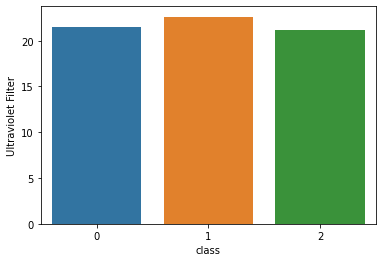

In [7]:
sns.barplot(x="class", y="Ultraviolet Filter", ci = None, data=new);

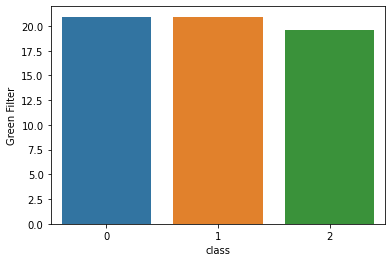

In [8]:
sns.barplot(x="class", y="Green Filter", ci = None, data=new);

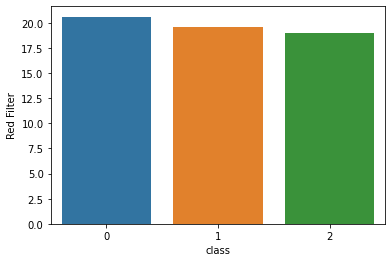

In [9]:
sns.barplot(x="class", y="Red Filter", ci = None, data=new);

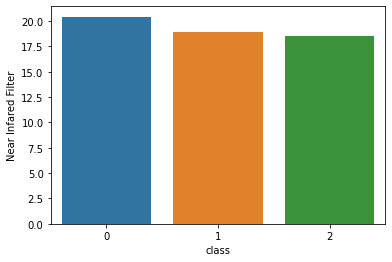

In [10]:
sns.barplot(x="class", y="Near Infared Filter", ci = None, data=new);

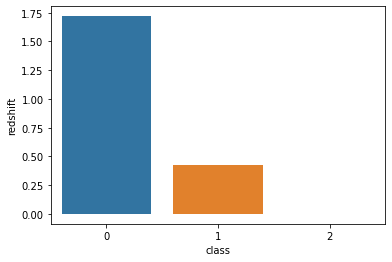

In [11]:
sns.barplot(x="class", y="redshift", ci = None, data=new);

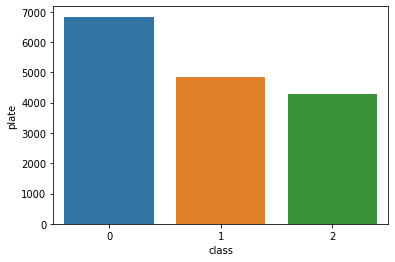

In [12]:
sns.barplot(x="class", y="plate", ci = None, data=new);

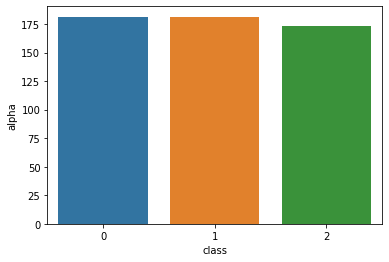

In [13]:
sns.barplot(x="class", y="alpha", ci = None, data=new);

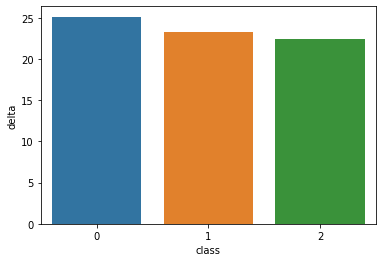

In [14]:
sns.barplot(x="class", y="delta", ci = None, data=new);

In [15]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,4.380200e+04,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000,43802.0,43802.000000,43802.000000,4.380200e+04,43802.000000,43802.000000,43802.000000,43802.000000
mean,1.237665e+18,179.463505,23.415373,22.092604,20.645961,19.665040,19.107188,18.794944,4488.844345,301.0,3.593694,190.555523,5.743261e+18,0.575418,5100.929752,55563.303411,453.717182
std,8.499295e+12,96.957526,19.583455,2.237113,2.022190,1.839742,1.745047,1.758315,1978.915833,0.0,1.555558,151.943640,3.320854e+18,0.732163,2949.496139,1811.640022,268.803208
min,1.237646e+18,0.005528,-16.847136,12.262400,10.511390,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995793e+17,-0.006863,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.410635,3.716461,20.369982,19.016785,18.189380,17.789413,17.519683,3180.000000,301.0,2.000000,85.000000,2.837297e+18,0.050728,2520.000000,54205.000000,231.000000
50%,1.237664e+18,179.270563,21.993519,22.185675,21.090330,20.124585,19.413100,19.018355,4263.000000,301.0,4.000000,153.000000,5.604787e+18,0.420003,4978.000000,55865.000000,441.000000
75%,1.237670e+18,235.914307,39.317359,23.690368,22.124820,21.045230,20.409900,19.931325,5641.000000,301.0,5.000000,244.000000,8.254154e+18,0.707996,7331.000000,56748.000000,640.000000
max,1.237681e+18,359.999810,83.000519,30.660390,31.602240,29.374110,30.250090,28.238290,8162.000000,301.0,6.000000,941.000000,1.412685e+19,7.011245,12547.000000,58932.000000,1000.000000


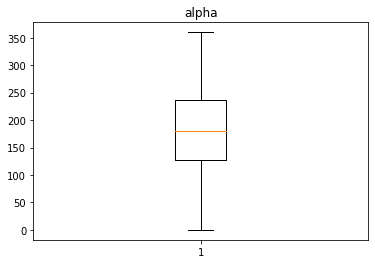

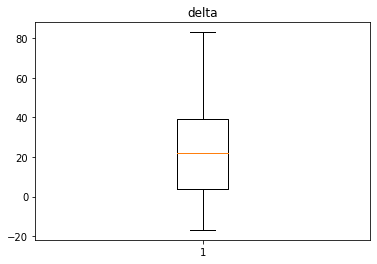

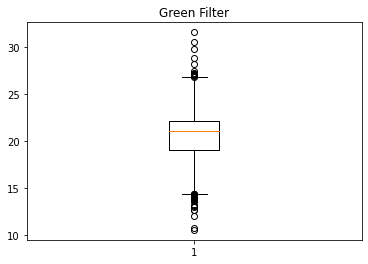

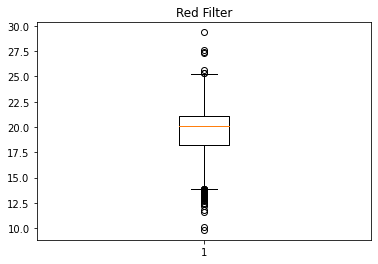

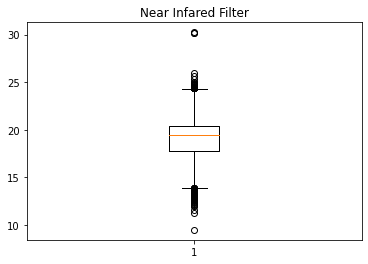

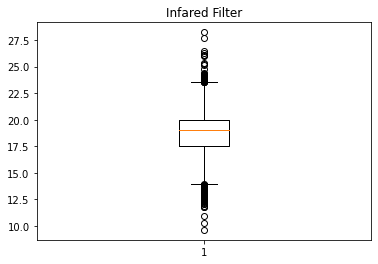

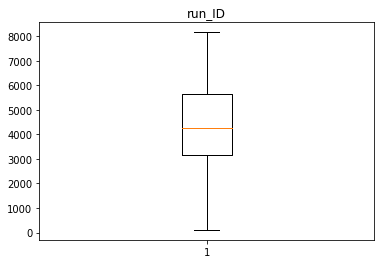

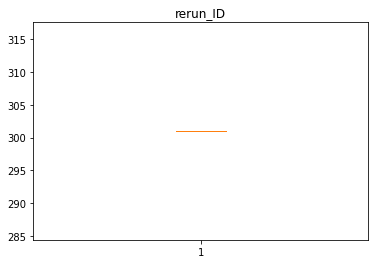

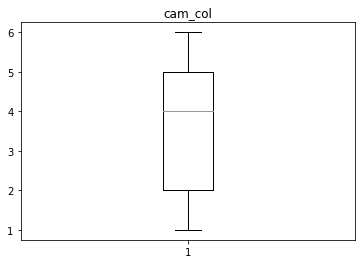

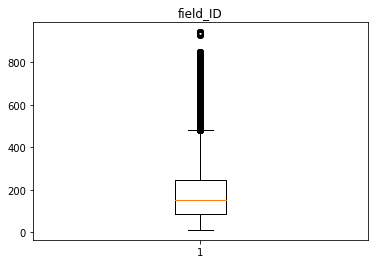

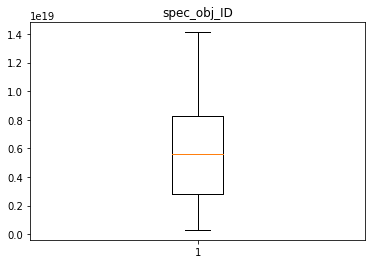

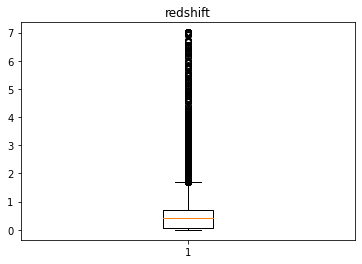

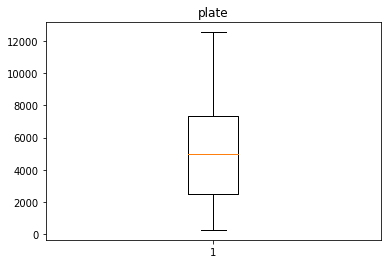

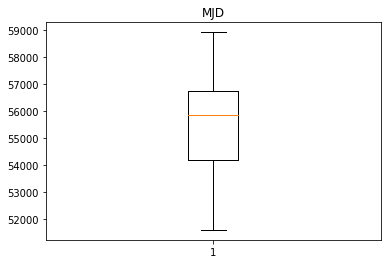

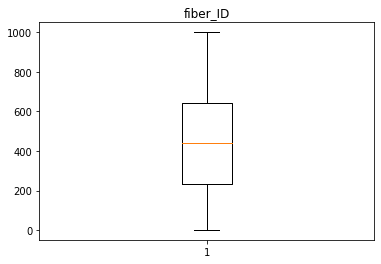

In [16]:
for column in ['alpha', 'delta',  'Green Filter', 'Red Filter', 'Near Infared Filter', 'Infared Filter', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD', 'fiber_ID']:
    plt.boxplot(data = new, x = column)
    plt.title(column)
    plt.show()

In [17]:
Q1 = new['Red Filter'].quantile(.50)
Q3 = new['Red Filter'].quantile(.75)

IQR = Q3 - Q1
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 - 1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

0.9206449999999968
18.743617500000006
19.664262500000007


In [18]:
new["Red Filter"] = np.where(new["Red Filter"] > 19.6655425,19.6655425, new["Red Filter"])
new["Red Filter"] = np.where(new["Red Filter"] < 18.746047500000003,18.746047500000003, new["Red Filter"])

In [19]:
Q1 = new['Near Infared Filter'].quantile(.50)
Q3 = new['Near Infared Filter'].quantile(.75)

IQR = Q3 - Q1
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 - 1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

0.9968000000000004
17.9179
18.9147


In [20]:
new["Near Infared Filter"] = np.where(new["Near Infared Filter"] > 18.909469999999995, 18.909469999999995, new["Near Infared Filter"])
new["Near Infared Filter"] = np.where(new["Near Infared Filter"] < 17.91811999999999, 17.91811999999999, new["Near Infared Filter"])

In [21]:
Q1 = new['field_ID'].quantile(.50)
Q3 = new['field_ID'].quantile(.75)

IQR = Q3 - Q1
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 - 1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

91.0
16.5
107.5


In [22]:
new["field_ID"] = np.where(new["field_ID"] > 98.5, 98.5, new["field_ID"])

In [23]:
Q1 = new['redshift'].quantile(.50)
Q3 = new['redshift'].quantile(.75)

IQR = Q3 - Q1
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 - 1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

0.287992425
-0.011985237499999968
0.27600718750000003


In [24]:
new["redshift"] = np.where(new["redshift"] > 0.28418271250000005, 0.28418271250000005, new["redshift"])

In [25]:
Q1 = new['Ultraviolet Filter'].quantile(.50)
Q3 = new['Ultraviolet Filter'].quantile(.75)

IQR = Q3 - Q1
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 - 1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

1.5046925000000009
19.928636249999997
21.43332875


In [26]:
new["Ultraviolet Filter"] = np.where(new["Ultraviolet Filter"] > 19.916677500000002, 19.916677500000002, new["Ultraviolet Filter"])

In [27]:
Q1 = new['Green Filter'].quantile(.50)
Q3 = new['Green Filter'].quantile(.75)

IQR = Q3 - Q1
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 - 1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

1.0344899999999981
19.538595000000004
20.573085000000003


In [28]:
new["Green Filter"] = np.where(new["Green Filter"] > 19.563936249999998, 19.563936249999998, new["Green Filter"])

In [29]:
Q1 = new['Infared Filter'].quantile(.50)
Q3 = new['Infared Filter'].quantile(.75)

IQR = Q3 - Q1
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 - 1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

0.9129700000000014
17.648899999999998
18.56187


In [30]:
new["Infared Filter"] = np.where(new["Infared Filter"] > 17.629807500000005, 17.629807500000005, new["Infared Filter"])

In [31]:
Q1 = new['field_ID'].quantile(.50)
Q3 = new['field_ID'].quantile(.75)

IQR = Q3 - Q1
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 - 1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

0.0
98.5
98.5


In [32]:
new["field_ID"] = np.where(new["field_ID"] > 98.5, 98.5, new["field_ID"])

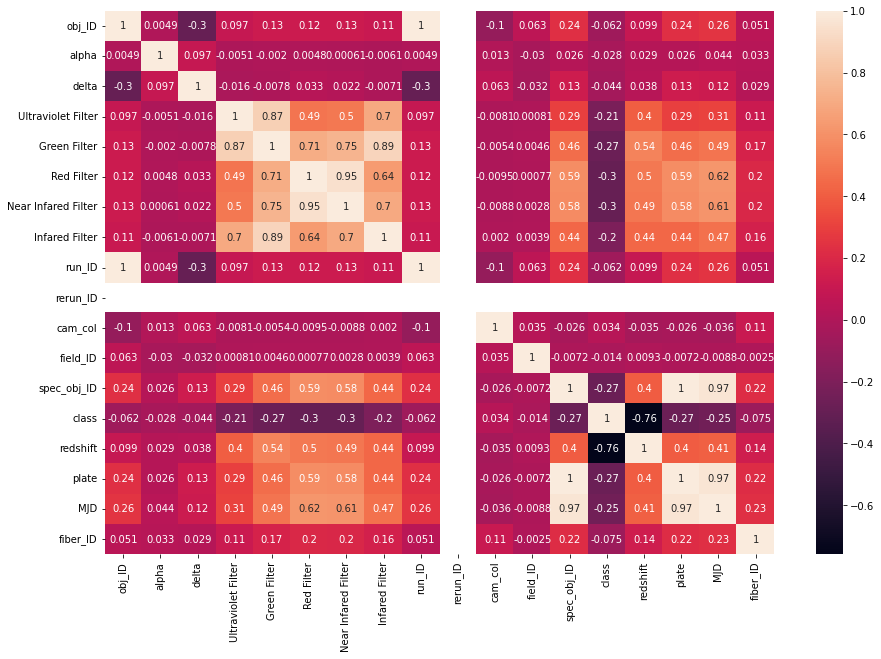

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(new.corr(), annot=True)

In [34]:
new_df = new.drop(['Green Filter', 'Near Infared Filter'], axis =1)
new_df

,obj_ID,alpha,delta,Ultraviolet Filter,Red Filter,Infared Filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,19.916678,19.665543,17.629808,3606,301,2,79.0,6.543777e+18,1,0.284183,5812,56354,171
1,1.237665e+18,144.826101,31.274185,19.916678,19.665543,17.629808,4518,301,5,98.5,1.176014e+19,1,0.284183,10445,58158,427
2,1.237661e+18,142.188790,35.582444,19.916678,19.665543,17.629808,3606,301,2,98.5,5.152200e+18,1,0.284183,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,19.916678,19.665543,17.629808,4192,301,3,98.5,1.030107e+19,1,0.284183,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.437180,18.746048,15.544610,8102,301,3,98.5,6.891865e+18,1,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43797,1.237659e+18,201.624727,6.578219,19.916678,18.746048,16.889030,3230,301,2,27.0,2.025522e+18,1,0.160690,1799,53556,101
43798,1.237679e+18,325.211753,2.045357,19.916678,19.665543,17.629808,7717,301,4,97.0,1.031689e+19,0,0.284183,9163,58043,968
43799,1.237661e+18,202.717281,45.848246,19.916678,19.665543,17.629808,3699,301,3,98.5,7.461520e+18,1,0.284183,6627,56369,661
43800,1.237661e+18,115.883288,20.052520,19.916678,19.665543,17.629808,3605,301,4,39.0,1.008138e+19,1,0.284183,8954,57453,261


In [35]:
y = new_df['class']
X = new_df.drop(columns=['class'], axis=1)
y.isna().sum()

0

In [36]:
sample = SMOTE(random_state = 45)
X, y = sample.fit_resample(X, y)

In [37]:
def calcu_mult(new_df):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

In [38]:
calcu_mult(new_df)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,obj_ID,7.258139e-10
1,alpha,1.002903e+00
2,delta,1.021801e+00
3,Ultraviolet Filter,1.097079e+00
4,Red Filter,1.449363e+00
5,Infared Filter,1.195429e+00
6,run_ID,1.055547e+00
7,rerun_ID,0.000000e+00
8,cam_col,1.002072e+00
9,field_ID,1.000260e+00


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size = 0.70, random_state = 45)

In [40]:
std_scale = MinMaxScaler()
X_train_norm = pd.DataFrame(std_scale.fit_transform(X_train))

In [41]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train_norm, y_train, test_size = .20, train_size = 0.80,  random_state = 45)

In [42]:
pca = PCA(n_components= 9)
model = pca.fit(X_train_)
PCA(n_components= 9)
print(model.explained_variance_ratio_)  

[0.37630798 0.12937128 0.10773371 0.0887831  0.07702508 0.0679702
 0.05620915 0.05592893 0.0294319 ]


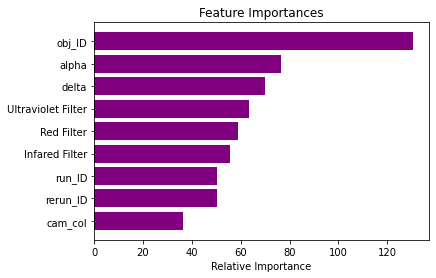

In [43]:
features = new_df.columns
importances = model.singular_values_
indices = np.argsort(importances)[-10:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [44]:
model = LogisticRegression()
gen = model.fit(X_train_,  y_train_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [45]:
coef_deter = gen.score(X_train_, y_train_)
coef_deter

0.7911584664242648

In [46]:
1 - (1-gen.score(X_train_, y_train_))*(len(y_train_)-1)/(len(y_train_)-X_train_.shape[1]-1)

0.7910863493147378

In [47]:
y_predict = gen.predict(X_test_)

In [48]:
cf_matrix = confusion_matrix(y_test_, y_predict)
print(cf_matrix)

[[3122  505    1]
 [1615 1960   74]
 [   0    0 3587]]


In [49]:
cv = RepeatedKFold(n_splits = 10, n_repeats =4, random_state =1)

In [ ]:
score = cross_val_score(gen, X_test_, y_test_, scoring = "accuracy", cv = cv, n_jobs = 1, error_score = "raise")
np.mean(score) 

In [51]:
classification_report(y_test_, y_predict)
print(classification_report(y_test_, y_predict))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75      3628
           1       0.80      0.54      0.64      3649
           2       0.98      1.00      0.99      3587

    accuracy                           0.80     10864
   macro avg       0.81      0.80      0.79     10864
weighted avg       0.81      0.80      0.79     10864



In [52]:
model_ = RandomForestClassifier()
gen_ = model_.fit(X_train_,  y_train_)

In [53]:
coef_deter = gen_.score(X_train_, y_train_)
coef_deter

0.9999539743176693

In [54]:
1 - (1-gen_.score(X_train_, y_train_))*(len(y_train_)-1)/(len(y_train_)-X_train_.shape[1]-1)

0.9999539584240914

In [55]:
y_predict_ = gen_.predict(X_test_)

In [56]:
cf_matrix = confusion_matrix(y_test_, y_predict_)
print(cf_matrix)

[[3314  314    0]
 [ 321 3308   20]
 [   0    0 3587]]


In [57]:
cv_ = RepeatedKFold(n_splits = 10, n_repeats =4, random_state =1)

In [ ]:
score_ = cross_val_score(gen, X_test_, y_test_, scoring = "accuracy", cv = cv_, n_jobs = 1, error_score = "raise")
np.mean(score_) 

In [59]:
classification_report(y_test_, y_predict_)
print(classification_report(y_test_, y_predict_))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3628
           1       0.91      0.91      0.91      3649
           2       0.99      1.00      1.00      3587

    accuracy                           0.94     10864
   macro avg       0.94      0.94      0.94     10864
weighted avg       0.94      0.94      0.94     10864



In [60]:
model = SVC(kernel='rbf', random_state=1, decision_function_shape='ovr', probability= True)
svc_result = model.fit(X_train_, y_train_)

In [61]:
coef_deter = svc_result.score(X_train_, y_train_)
coef_deter

0.8278639480830303

In [62]:
y_predict__= svc_result.predict(X_test_)

In [63]:
cf_matrix_ = confusion_matrix(y_test_, y_predict__)
print(cf_matrix_)

[[2919  708    1]
 [1138 2466   45]
 [   0    0 3587]]


In [64]:
sv = RepeatedKFold(n_splits = 10, n_repeats =4, random_state =1)

In [ ]:
score__ = cross_val_score(gen, X_test_, y_test_, scoring = "accuracy", cv = sv, n_jobs = 1, error_score = "raise")
np.mean(score__) 

In [66]:
classification_report(y_test_, y_predict__)
print(classification_report(y_test_, y_predict__))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      3628
           1       0.78      0.68      0.72      3649
           2       0.99      1.00      0.99      3587

    accuracy                           0.83     10864
   macro avg       0.83      0.83      0.83     10864
weighted avg       0.83      0.83      0.82     10864



In [67]:
classes = svc_result.classes_

In [68]:
y_prob = svc_result.predict_proba(X_test_)

In [69]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr



In [70]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [71]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

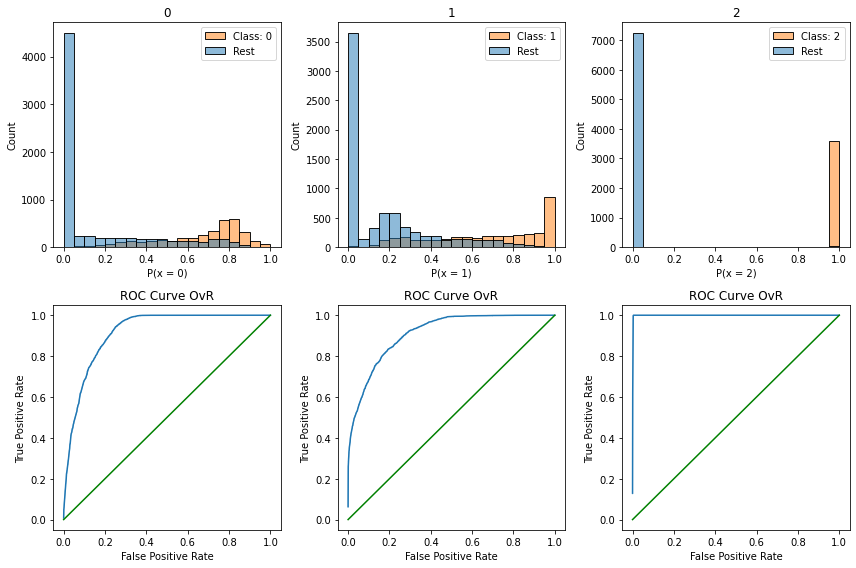

In [73]:
from sklearn.metrics import roc_auc_score

plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test_.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test_]
    df_aux['prob'] = y_prob[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()  